https://iupred.elte.hu/help

- Disorder Analysis

In [1]:
import os
import json

def load_fasta(fasta_path):
    """
    Load protein sequences from a FASTA file.

    Parameters:
    -----------
    fasta_path : str
        Path to FASTA file

    Returns:
    --------
    dict
        Dictionary with protein accessions as keys and sequences as values
    """
    sequences_dict = {}

    with open(os.path.expanduser(fasta_path), 'r') as f:
        current_acc = None
        current_seq = []

        for line in f:
            line = line.strip()
            if line.startswith('>'):
                # Save previous sequence if exists
                if current_acc:
                    sequences_dict[current_acc] = ''.join(current_seq)

                # Start new sequence
                current_acc = line[1:]
                current_seq = []
            else:
                current_seq.append(line)

        # Save last sequence
        if current_acc:
            sequences_dict[current_acc] = ''.join(current_seq)

    print(f"✓ Loaded {len(sequences_dict)} sequences from {fasta_path}")
    return sequences_dict

In [3]:
import os
import numpy as np
import copy
import json

# Disorder Prediction Analysis
workdir = "~/Desktop/work/protein_linkers/hs_cytoplasmic"
proteins_path = os.path.join(os.path.expanduser(workdir), 'linkers_mean_disorder.json')
fasta_path = os.path.expanduser(f"{workdir}/hs_cytoplasm.fa")
fasta_dict = load_fasta(fasta_path)

with open(os.path.expanduser(proteins_path), 'r') as f:
        proteins = json.load(f)

#auipred = run_iupred_on_uniprot_dict(proteins)

✓ Loaded 8782 sequences from /home/pospim/Desktop/work/protein_linkers/hs_cytoplasmic/hs_cytoplasm.fa


In [4]:
# Collect disorder values for all linkers across all proteins
linker_disorders = []
for protein in proteins.values():
    for linker in protein.get('linkers', []):
        if 'disorder' in linker:
            linker_disorders.append(linker['disorder'])
domain_disorders = []
for protein in proteins.values():
    for domain in protein.get('domains', []):
        if 'disorder' in domain:
            domain_disorders.append(domain['disorder'])

- Secondary Structure Analysis

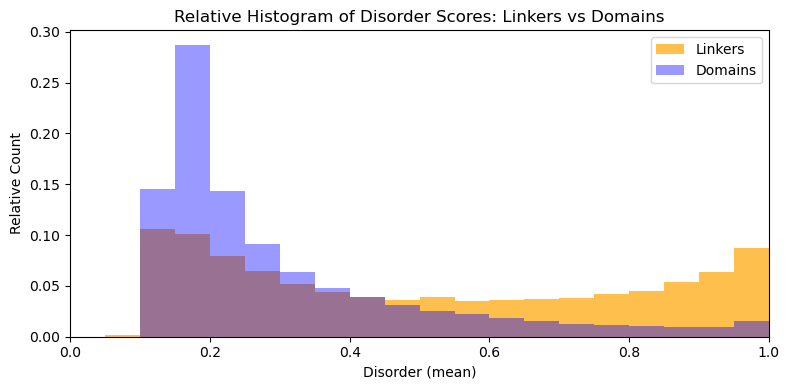

In [5]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(0, 1, 21)
linker_hist, _ = np.histogram(linker_disorders, bins=bins)
domain_hist, _ = np.histogram(domain_disorders, bins=bins)

# Convert to relative frequencies
linker_rel = linker_hist / linker_hist.sum() if linker_hist.sum() > 0 else linker_hist
domain_rel = domain_hist / domain_hist.sum() if domain_hist.sum() > 0 else domain_hist

plt.figure(figsize=(8, 4))
plt.bar(bins[:-1], linker_rel, width=(bins[1]-bins[0]), color='orange', alpha=0.7, align='edge', label='Linkers')
plt.bar(bins[:-1], domain_rel, width=(bins[1]-bins[0]), color='blue', alpha=0.4, align='edge', label='Domains')
plt.xlim(0, 1)
plt.xlabel('Disorder (mean)')
plt.ylabel('Relative Count')
plt.title('Relative Histogram of Disorder Scores: Linkers vs Domains')
plt.legend()
plt.tight_layout()
plt.show()